### Importación de datos



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


#1. Análisis de facturación



## 1.1 Cálculo de facturación por tienda

In [19]:
# Diccionario de tiendas
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Crear diccionario de facturación por tienda
facturacion = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}

# Crear DataFrame
facturacion_df = pd.DataFrame(list(facturacion.items()), columns=['Tienda', 'Facturación ($ COP)'])

# Calcular facturación total de todas las tiendas
total_general = facturacion_df['Facturación ($ COP)'].sum()

# Formato de visualización
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar tabla y total
print("FACTURACIÓN POR CADA TIENDA:")
display(facturacion_df)
print(f"\nLa facturación total de todas las tiendas es: $ {total_general:,.2f} COP")

FACTURACIÓN POR CADA TIENDA:


,Tienda,Facturación ($ COP)
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"



La facturación total de todas las tiendas es: $ 4,403,619,200.00 COP


## 1.2 Representación gráfica de facturación por tienda

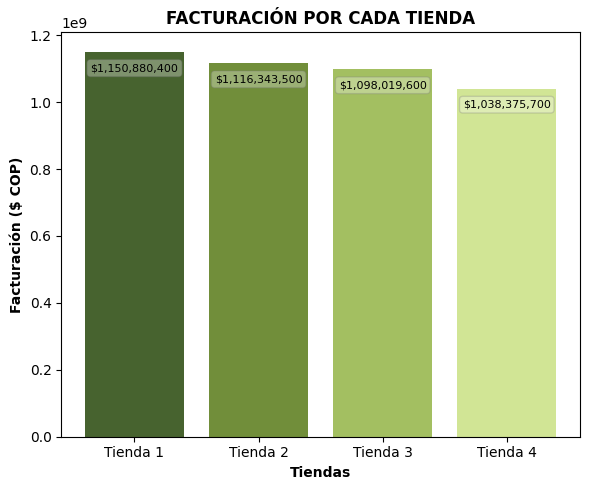

In [20]:
# Definir colores
colores = ['#47632F', '#718E3A', '#A3BF61', '#D1E595']

plt.figure(figsize=(6,5))

# Crear gráfico de barras con colores
plt.bar(facturacion_df['Tienda'], facturacion_df['Facturación ($ COP)'], color=colores)

# Configuración del gráfico
plt.title('FACTURACIÓN POR CADA TIENDA', fontweight='bold')
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Facturación ($ COP)', fontweight ='bold')

# Añadir etiquetas con los valores encima de cada barra
for i, valor in enumerate(facturacion_df['Facturación ($ COP)']):
    plt.text(i, valor*0.97, f"${valor:,.0f}", ha='center', va='top', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.3))

plt.tight_layout()
plt.show()

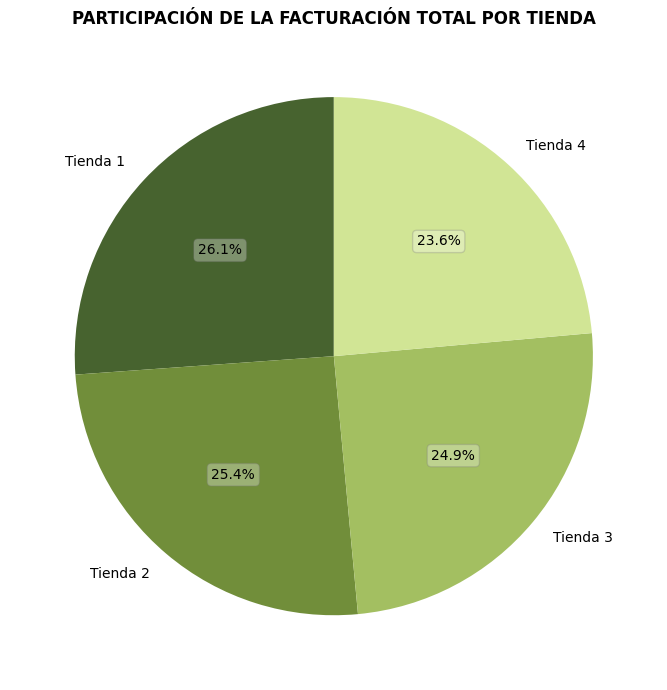

In [21]:
# Datos para el gráfico
labels = facturacion_df['Tienda']
valores = facturacion_df['Facturación ($ COP)']

# Crear gráfico circular
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',  # Solo mostrar porcentaje
    startangle=90,
    colors=['#47632F', '#718E3A', '#A3BF61', '#D1E595'],
    textprops={'fontsize': 10}
)

# Agregar fondo semitransparente a las etiquetas de porcentaje
for autotext in autotexts:
    autotext.set_bbox(dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.3))

# Estilo del gráfico
plt.title('PARTICIPACIÓN DE LA FACTURACIÓN TOTAL POR TIENDA', fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

## 2.1 Cálculo de ventas por categoría por tienda

In [22]:
# Crear un diccionario vacío para almacenar las ventas por categoría por tienda
ventas_categoria = {}

# Iterar sobre las tiendas y calcular la suma de ventas por categoría
for nombre, df in tiendas.items():
    ventas = df.groupby('Categoría del Producto')['Precio'].sum()  # Agrupar por categoría y calcular la suma de ventas
    ventas_categoria[nombre] = ventas  # Almacenar las ventas de cada tienda en el diccionario

# Convertir el diccionario en un DataFrame, asegurándose de que no haya valores nulos
ventas_cat_df = pd.DataFrame(ventas_categoria).fillna(0)

# Mostrar el resultado
print("VENTAS POR CATEGORÍA POR TIENDA:")
display(ventas_cat_df)

VENTAS POR CATEGORÍA POR TIENDA:


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,"12,698,400.00","14,746,900.00","15,060,000.00","15,074,500.00"
Deportes y diversión,"39,290,000.00","34,744,500.00","35,593,100.00","33,350,100.00"
Electrodomésticos,"363,685,200.00","348,567,800.00","329,237,900.00","283,260,200.00"
Electrónicos,"429,493,500.00","410,831,100.00","410,775,800.00","409,476,100.00"
Instrumentos musicales,"91,299,000.00","104,990,300.00","77,380,900.00","75,102,400.00"
Juguetes,"17,995,700.00","15,945,400.00","19,401,100.00","20,262,200.00"
Libros,"8,784,900.00","10,091,200.00","9,498,700.00","9,321,300.00"
Muebles,"187,633,700.00","176,426,300.00","201,072,100.00","192,528,900.00"


## 2.2 Representación gráfica de ventas por categoría por tienda

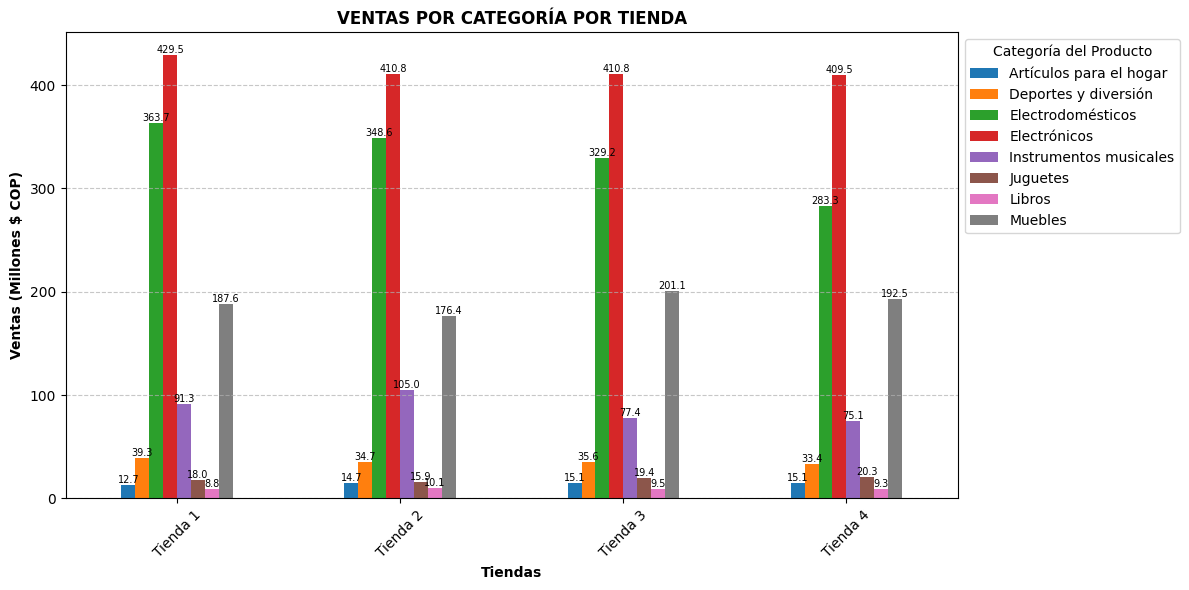

In [24]:
# Convertir el DataFrame de ventas a millones
ventas_millones = ventas_cat_df / 1_000_000

# Crear el gráfico de barras (transponiendo para que las tiendas sean el eje X)
ax = ventas_millones.T.plot(kind='bar', figsize=(12, 6))

# Configurar título y etiquetas
plt.title('VENTAS POR CATEGORÍA POR TIENDA', fontweight='bold')
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Ventas (Millones $ COP)', fontweight='bold')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad

# Añadir leyenda fuera del gráfico
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1, 1), loc='upper left')

# Mejorar el diseño del gráfico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas guía horizontales

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',                         # Formato abreviado con 1 decimal
                    (p.get_x() + p.get_width() / 2., height), # Posición centrada sobre la barra
                    ha='center', va='bottom',
                    fontsize=7, color='black', rotation=0)

# Mostrar el gráfico
plt.show()

# 3. Calificación promedio de la tienda

## 3.1 Cálculo de calificación promedio por tienda

In [25]:
# Calcular la calificación promedio por tienda
calificaciones = {nombre: df['Calificación'].mean() for nombre, df in tiendas.items()}

# Convertir el diccionario en un DataFrame ordenado
calificaciones_df = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificación promedio'])

# Establecer el formato de visualización para dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar el título y el DataFrame con los resultados
print("CALIFICACIÓN PROMEDIO POR TIENDA:")
display(calificaciones_df)

CALIFICACIÓN PROMEDIO POR TIENDA:


,Tienda,Calificación promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


## 3.2 Representación gráfica de calificación promedio por tienda

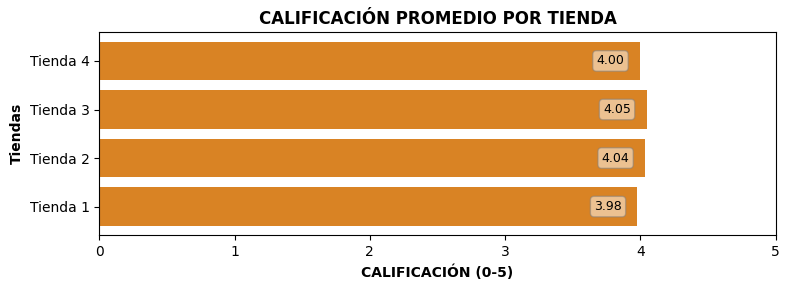

In [26]:
plt.figure(figsize=(8, 3))  # Definir el tamaño del gráfico

# Crear gráfico de barras horizontales con color personalizado
plt.barh(calificaciones_df['Tienda'], calificaciones_df['Calificación promedio'], color=['#D98324'])

# Títulos y etiquetas de los ejes
plt.title('CALIFICACIÓN PROMEDIO POR TIENDA', fontweight='bold')
plt.xlabel('CALIFICACIÓN (0-5)', fontweight='bold')
plt.ylabel('Tiendas', fontweight='bold')
plt.xlim(0, 5)  # Limitar el eje X al rango de calificación estándar

# Añadir etiquetas con los valores dentro de cada barra
for i, valor in enumerate(calificaciones_df['Calificación promedio']):
    plt.text(valor * 0.92, i, f"{valor:.2f}", va='center', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.5))

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 4. Productos más y menos vendidos

## 4.1 Cálculo de productos más y menos vendidos por tienda

#### 4.1.1 Productos más y menos vendidos por tienda

In [27]:
# Lista para almacenar los resultados
datos = []

# Recorrer cada tienda
for nombre, df in tiendas.items():
    # Agrupar los productos: cantidad vendida, ingreso total
    resumen = df.groupby("Producto").agg({
        "Producto": "count",          # Cuenta cuántas veces se vendió
        "Precio": "sum"               # Suma de todos los precios (ingreso total)
    })
    resumen.columns = ["Cantidad", "Ingreso Total"]  # Renombrar columnas

    # Más vendidos
    mas_vendidos = resumen.sort_values("Cantidad", ascending=False).head(3)
    for producto, fila in mas_vendidos.iterrows():
        datos.append([nombre, "Más vendido", producto, fila["Cantidad"], fila["Ingreso Total"]])

    # Menos vendidos
    menos_vendidos = resumen.sort_values("Cantidad", ascending=True).head(3)
    for producto, fila in menos_vendidos.iterrows():
        datos.append([nombre, "Menos vendido", producto, fila["Cantidad"], fila["Ingreso Total"]])

# Crear el DataFrame
ventas_df = pd.DataFrame(datos, columns=[
    "Tienda", "Tipo de Producto", "Producto", "Cantidad Vendida", "Ingresos Totales ($ COP)"])

# Crear DataFrame con los productos más y menos vendidos
mas_vendidos_df = ventas_df[ventas_df["Tipo de Producto"] == "Más vendido"]
menos_vendidos_df = ventas_df[ventas_df["Tipo de Producto"] == "Menos vendido"]

# Formato decimal bonito
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar resultados
print("📦 PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA:")
display(ventas_df)

📦 PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA:


,Tienda,Tipo de Producto,Producto,Cantidad Vendida,Ingresos Totales ($ COP)
0,Tienda 1,Más vendido,Armario,60.00,"29,462,300.00"
1,Tienda 1,Más vendido,TV LED UHD 4K,60.00,"142,150,200.00"
2,Tienda 1,Más vendido,Microondas,60.00,"34,761,500.00"
3,Tienda 1,Menos vendido,Auriculares con micrófono,33.00,"4,730,800.00"
4,Tienda 1,Menos vendido,Celular ABXY,33.00,"32,651,000.00"
5,Tienda 1,Menos vendido,Olla de presión,35.00,"2,629,300.00"
6,Tienda 2,Más vendido,Iniciando en programación,65.00,"3,127,800.00"
7,Tienda 2,Más vendido,Microondas,62.00,"36,192,000.00"
8,Tienda 2,Más vendido,Batería,61.00,"46,175,300.00"
9,Tienda 2,Menos vendido,Juego de mesa,32.00,"5,811,900.00"


#### 4.1.2 Productos que generaron más y menos ingresos por tienda

In [28]:
# Lista para almacenar los resultados
datos = []

# Recorrer cada tienda
for nombre, df in tiendas.items():
    # Agrupar los productos: cantidad vendida, ingreso total
    resumen = df.groupby("Producto").agg({
        "Producto": "count",          # Cuenta cuántas veces se vendió
        "Precio": "sum"               # Suma de todos los precios (ingreso total)
    })
    # Aplanar columnas
    resumen.columns = ["Cantidad", "Ingreso Total"]

    # Productos con más ingresos
    mas_ingresos = resumen.sort_values("Ingreso Total", ascending=False).head(3)
    for producto, fila in mas_ingresos.iterrows():
        datos.append([nombre, "Más ingresos", producto, fila["Cantidad"], fila["Ingreso Total"]])

    # Productos con menos ingresos
    menos_ingresos = resumen.sort_values("Ingreso Total", ascending=True).head(3)
    for producto, fila in menos_ingresos.iterrows():
        datos.append([nombre, "Menos ingresos", producto, fila["Cantidad"], fila["Ingreso Total"]])

# Crear el DataFrame
ventas_df = pd.DataFrame(datos, columns=[
    "Tienda", "Tipo de Producto", "Producto", "Cantidad Vendida", "Ingresos Totales ($ COP)"])

# Crear DataFrame de productos con mas y menos ingresos
mas_ingresos_df = ventas_df[ventas_df["Tipo de Producto"] == "Más ingresos"]
menos_ingresos_df = ventas_df[ventas_df["Tipo de Producto"] == "Menos ingresos"]

# Formato decimal
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar la tabla final
print("💰 PRODUCTOS QUE GENERARON MÁS Y MENOS INGRESOS POR TIENDA:")
display(ventas_df)

💰 PRODUCTOS QUE GENERARON MÁS Y MENOS INGRESOS POR TIENDA:


,Tienda,Tipo de Producto,Producto,Cantidad Vendida,Ingresos Totales ($ COP)
0,Tienda 1,Más ingresos,TV LED UHD 4K,60.00,"142,150,200.00"
1,Tienda 1,Más ingresos,Refrigerador,54.00,"112,143,300.00"
2,Tienda 1,Más ingresos,Iphone 15,49.00,"97,902,200.00"
3,Tienda 1,Menos ingresos,Cuerda para saltar,40.00,"652,800.00"
4,Tienda 1,Menos ingresos,Dinosaurio Rex,40.00,"688,900.00"
5,Tienda 1,Menos ingresos,Cubo mágico 8x8,44.00,"696,900.00"
6,Tienda 2,Más ingresos,Iphone 15,55.00,"113,225,800.00"
7,Tienda 2,Más ingresos,TV LED UHD 4K,45.00,"103,375,000.00"
8,Tienda 2,Más ingresos,Refrigerador,49.00,"97,632,500.00"
9,Tienda 2,Menos ingresos,Cubo mágico 8x8,45.00,"643,600.00"


## 4.2 Representación gráfica de productos más y menos vendidos por tienda

#### 4.2.1 Gráfico productos más y menos vendidos por tienda

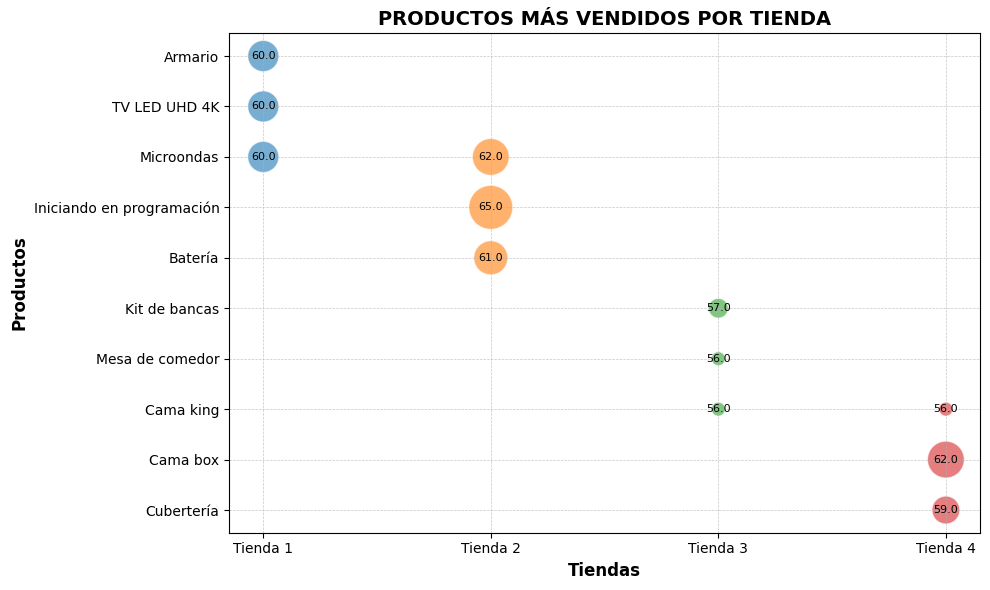

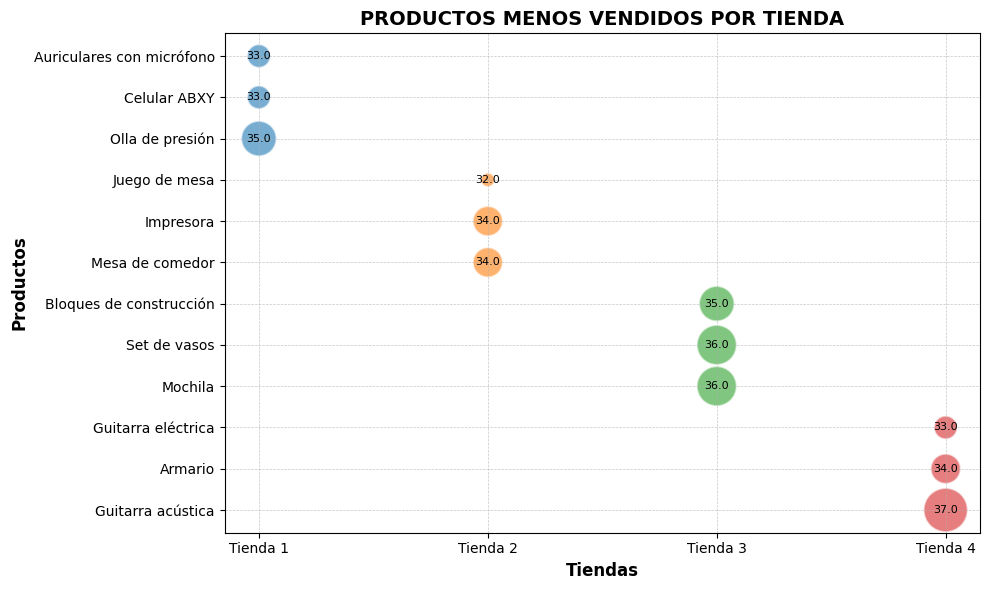

In [29]:
#PRODUCTOS MÁS VENDIDOS POR TIENDA
# Crear el gráfico de burbuja
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mas_vendidos_df,
    x="Tienda", y="Producto", size="Cantidad Vendida", hue="Tienda",
    sizes=(100, 1000), alpha=0.6,
    legend=False
)

# Añadir el etiquetado de las cantidades
for i in range(mas_vendidos_df.shape[0]):
    plt.text(
        mas_vendidos_df["Tienda"].iloc[i], mas_vendidos_df["Producto"].iloc[i],
        str(mas_vendidos_df["Cantidad Vendida"].iloc[i]),
        horizontalalignment="center", verticalalignment="center",
        fontsize=8, color="black"
    )

# Añadir título y etiquetas
plt.title("PRODUCTOS MÁS VENDIDOS POR TIENDA", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustar el layout para que todo se vea bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#PRODUCTOS MENOS VENDIDOS POR TIENDA
# Crear el gráfico de burbuja
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=menos_vendidos_df,
    x="Tienda", y="Producto", size="Cantidad Vendida", hue="Tienda",
    sizes=(100, 1000), alpha=0.6,
    legend=False
)

# Añadir el etiquetado de las cantidades
for i in range(menos_vendidos_df.shape[0]):
    plt.text(
        menos_vendidos_df["Tienda"].iloc[i], menos_vendidos_df["Producto"].iloc[i],
        str(menos_vendidos_df["Cantidad Vendida"].iloc[i]),
        horizontalalignment="center", verticalalignment="center",
        fontsize=8, color="black"
    )

# Añadir título y etiquetas
plt.title("PRODUCTOS MENOS VENDIDOS POR TIENDA", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### 4.2.2 Gráfico de productos que generaron más y menos ingresos por tienda

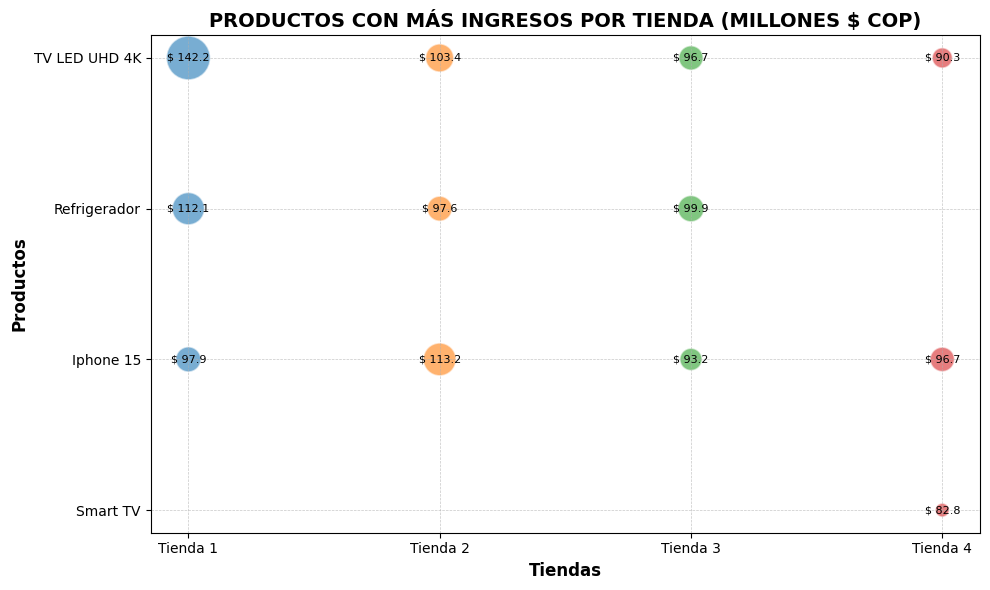

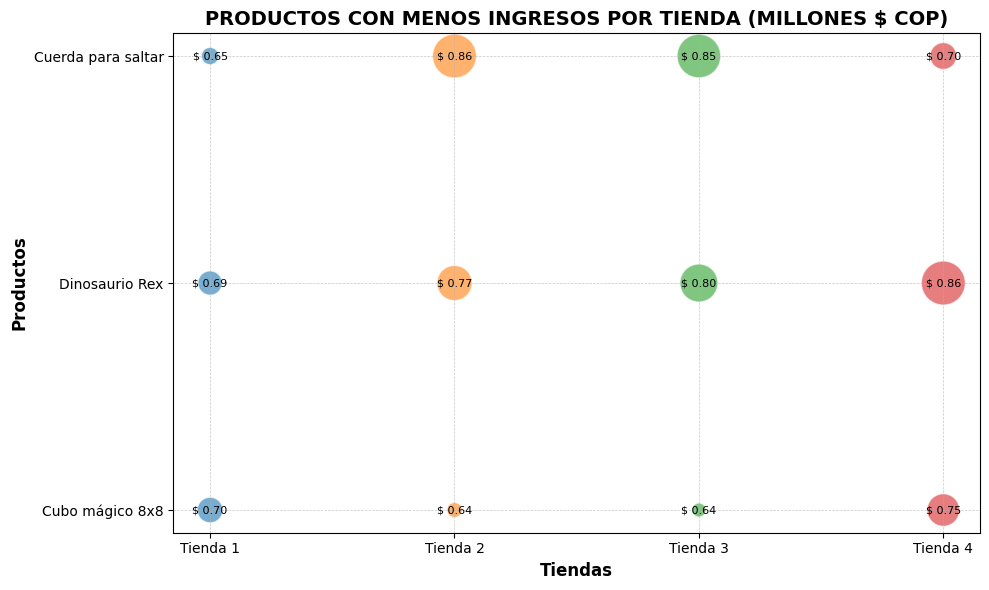

In [30]:
#PRODUCTOS QUE GENERARON MÁS INGRESOS POR TIENDA
# Copia del DataFrame y escala a millones con 3 cifras decimales
mas_ingresos_df_plot = mas_ingresos_df.copy()
mas_ingresos_df_plot["Ingreso Millones"] = (mas_ingresos_df_plot["Ingresos Totales ($ COP)"] / 1_000_000).round(3)

# Gráfico de burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mas_ingresos_df_plot,
    x="Tienda", y="Producto", size="Ingreso Millones", hue="Tienda",
    sizes=(100, 1000), alpha=0.6, legend=False
)

# Etiquetado de ingresos en millones
for i in range(mas_ingresos_df_plot.shape[0]):
    plt.text(
        mas_ingresos_df_plot["Tienda"].iloc[i],
        mas_ingresos_df_plot["Producto"].iloc[i],
        f"$ {mas_ingresos_df_plot['Ingreso Millones'].iloc[i]:,.1f}",
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=8,
        color="black"
    )

# Título y etiquetas
plt.title("PRODUCTOS CON MÁS INGRESOS POR TIENDA (MILLONES $ COP)", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#PRODUCTOS QUE GENERARON MENOS INGRESOS POR TIENDA
# Copia del DataFrame y escala a millones con 3 cifras decimales
menos_ingresos_df_plot = menos_ingresos_df.copy()
menos_ingresos_df_plot["Ingreso Millones"] = (menos_ingresos_df_plot["Ingresos Totales ($ COP)"] / 1_000_000).round(3)

# Gráfico de burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=menos_ingresos_df_plot,
    x="Tienda", y="Producto", size="Ingreso Millones", hue="Tienda",
    sizes=(100, 1000), alpha=0.6, legend=False
)

# Etiquetado de ingresos en millones
for i in range(menos_ingresos_df_plot.shape[0]):
    plt.text(
        menos_ingresos_df_plot["Tienda"].iloc[i],
        menos_ingresos_df_plot["Producto"].iloc[i],
        f"$ {menos_ingresos_df_plot['Ingreso Millones'].iloc[i]:,.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=8,
        color="black"
    )

# Título y etiquetas
plt.title("PRODUCTOS CON MENOS INGRESOS POR TIENDA (MILLONES $ COP)", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

## 5.1 Cálculo del costo de envío promedio por tienda

In [31]:
# Calcular el costo de envío promedio por tienda
envio_promedio = {nombre: df['Costo de envío'].mean() for nombre, df in tiendas.items()}

# Convertir el diccionario en un DataFrame legible
envio_prom_df = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Costo Envío Promedio ($ COP)'])

# Establecer el formato numérico para mostrar dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar el título y la tabla con los resultados
print("COSTO DE ENVÍO PROMEDIO POR TIENDA:")
display(envio_prom_df)

COSTO DE ENVÍO PROMEDIO POR TIENDA:


,Tienda,Costo Envío Promedio ($ COP)
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


## 5.2 Representación gráfica del costo de envío promedio por tienda

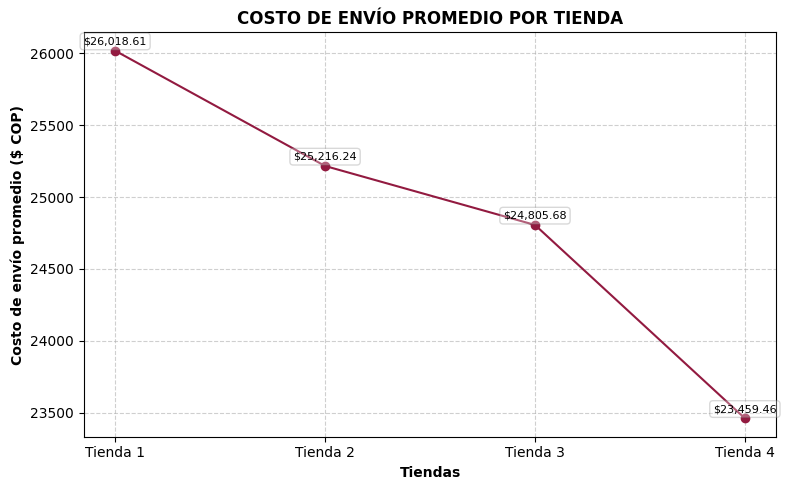

In [33]:
# Crear gráfico de línea con tamaño personalizado
plt.figure(figsize=(8, 5))
plt.plot(envio_prom_df['Tienda'], envio_prom_df['Costo Envío Promedio ($ COP)'],
         marker='o', linestyle='-', color='#921A40')  # Línea con puntos marcados

# Agregar título y etiquetas a los ejes
plt.title('COSTO DE ENVÍO PROMEDIO POR TIENDA', fontweight='bold')
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Costo de envío promedio ($ COP)', fontweight='bold')

# Añadir líneas de cuadrícula
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el valor numérico encima de cada punto de la línea
for i, row in envio_prom_df.iterrows():
    plt.text(row['Tienda'], row['Costo Envío Promedio ($ COP)'] + 30,
             f"${row['Costo Envío Promedio ($ COP)']:,.2f}",
             ha='center', va='bottom', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                       edgecolor='gray', alpha=0.3))

# Ajustar el diseño para evitar solapamientos y mostrar el gráfico
plt.tight_layout()
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#A4B465'>

# **<font color="#000000"> INFORME </font>**
</td>
</tr>
</table>

## **INTRODUCCIÓN**

El presente informe tiene como objetivo asesorar al Sr. Juan en la toma de una decisión respecto  a qué tienda de su cadena Alura Store debería vender para liberar capital e iniciar un nuevo emprendimiento. Para ello, se ha realizado un análisis basado en cinco criterios clave:

- Los ingresos totales de las tiendas
- Las categorías de productos más y menos vendidas
- Las calificaciones promedio de los clientes por tienda
- Los productos más y menos vendidos
- El coste de envío promedio para cada tienda

---

## **DESARROLLO**

### 1. Ingresos totales de las tiendas:
- **Ventaja:** La **Tienda 1** lidera en ingresos globales con $1.150.880.400,00 COP.

- **Desventaja:** La **Tienda 4** genera los menores ingresos globales con $1.038.375.700,00 COP.


### 2. Categorías de productos más y menos vendidas:
Entre las categorías de productos más vendidas se identificaron los electrónicos, electrodomésticos y muebles.  
En contraste, entre las menos vendidas se encuentran los artículos para el hogar, libros y juguetes.

- **Ventaja:** Las **Tiendas 1 y 2** lideran en ventas de las categorías más fuertes (Electrodomésticos y Electrónicos).  
- **Desventaja:** La **Tienda 4** cuenta con los menores ingresos en Electrodomésticos y Electrónicos comparado con otras tiendas, afectando su facturación global.


### 3. Calificaciones promedio de los clientes por tienda:
- **Ventaja:** La **Tienda 3** obtuvo la mejor percepción por parte de los clientes.  
- **Desventaja:** La **Tienda 1**, pese a ser la más rentable, tiene la más baja calificación de satisfacción.


### 4. Productos más y menos vendidos:
Entre los productos más vendidos destacan la TV LED UHD 4K, iPhone 15 y Refrigerador.  
Por el contrario, entre los menos vendidos figuran la cuerda para saltar, Dinosaurio Rex y Cubo mágico 8x8.

- **Ventaja:** La **Tienda 1** lidera con los productos de mayor ingreso.  
- **Desventaja:** En la **Tienda 4**, todos sus productos top generan menos ingresos que los mismos productos en otras tiendas.


### 5. Coste de envío promedio para cada tienda:
- **Ventaja:** La **Tienda 4** cuenta con una logística eficiente y más económica.  
- **Desventaja:** La **Tienda 1** tiene el costo logístico más elevado.

---

## **CONCLUSIÓN**

Tras analizar los datos operativos, comerciales y de experiencia del cliente se extrae las siguientes conclusiones clave:

- **Tienda 1** se posiciona como la más rentable del grupo, con el mayor volumen de ingresos y excelente desempeño en productos de alto valor. No obstante, presenta la calificación promedio más baja por parte de los clientes, lo cual representa una oportunidad de mejora en la experiencia del consumidor.

- **Tiendas 2 y 3** reflejan un equilibrio saludable entre facturación, reputación y diversidad de ventas. Ambas mantienen buenas calificaciones, niveles de ingreso consistentes y un buen posicionamiento en categorías clave, consolidándose como unidades comerciales estables y con potencial de crecimiento.

- **Tienda 4**, en contraste, es la menos eficiente dentro de la cadena Alura Store. Si bien destaca por ofrecer el menor costo de envío y una calificación aceptable, su facturación es la más baja, su rendimiento en las categorías más vendidas es inferior y los productos con mejor rotación generan ingresos significativamente menores en comparación con las demás tiendas.

---

## **RECOMENDACIÓN**

Se recomienda al Sr. Juan vender la **Tienda 4**, ya que representa la menor rentabilidad y el menor aporte estratégico al negocio. Esta decisión permitirá liberar recursos con un impacto mínimo en la operación general, facilitando así el inicio de su nuevo emprendimiento.
